<br>
<img src="data/logoMoSEF.jpeg" width=90px align="left">
<div align="right">Enseignant : Amed Coulibaly</div>
<div align="right">Réalisé par : Gaoussou DIAKITE et Eunice KOFFI</div>
<div align="right">Année : 2022/2023</div><br><br><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen">Master 2 Modélistaion Statistiques Economiques et Financières</span></div><br>
<div align="center"><span style="font-family:Lucida Caligraphy;font-size:28px;color:#e60000">Projet Data Mining</span></div><br><br>
<hr>

<br>

<div align="center"><span style="font-family:Lucida Caligraphy;font-size:32px;color:darkgreen"> ** Clustering ** </span></div><br>
<hr>

## Importation des modules et packages

In [1]:
#Importation des modules et packages 
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import cluster, datasets

## Lecture de la base de données

In [2]:
# Lecture de la base de données
table = pd.read_csv('data/données.csv', index_col=0)

In [3]:
# Caractéristiques de la table
print('La base de données a ', table.shape[0], 'lignes et ', table.shape[1], 'colones.')

La base de données a  100 lignes et  84 colones.


# Clustering

In [4]:
# creer une variable X numpy contenant les vecteurs numeriques
X=np.array(table)

#instanciation de la classe StandardScaler, MinMaxScaler, RobustScaler, Normalizer

sc = StandardScaler().fit(X)

#transformation – centrage-réduction
X_scaled = sc.transform(X)

## Proposer et implementer une méthode de clustering sur le jeu de données.

Dans cette partie, on a décidé d'utiliser l'algorithme Kmeans comme méthode de clustering sur le jeu de données. Pour ce faire, nous utilisons la base de données normalisée pour éviter d'accorder un poids trop important aux valeurs aberrantes et aux outliers.

On va essayer d'afficher les graphiques avec des nombres de cluster différents pour pouvoir visualiser les départements d’un même groupe qui sont similaires les uns des autres. 

Les graphiques ci-dessous nous montre qu'on a bien des groupes de départements qui sont similaires.

Text(0.5, 1.0, 'K=4, J=3647.05')

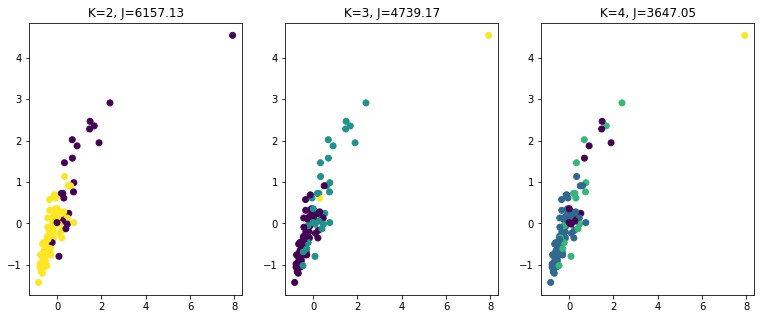

In [5]:
km2 = cluster.KMeans(n_clusters=2).fit(X_scaled)
km3 = cluster.KMeans(n_clusters=3).fit(X_scaled)
km4 = cluster.KMeans(n_clusters=4).fit(X_scaled)
km5 = cluster.KMeans(n_clusters=5).fit(X_scaled)

plt.figure(figsize=(13, 5))

plt.subplot(131)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=km2.labels_)
plt.title("K=2, J=%.2f" % km2.inertia_)

plt.subplot(132)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=km3.labels_)
plt.title("K=3, J=%.2f" % km3.inertia_)

plt.subplot(133)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=km4.labels_)#.astype(np.float))
plt.title("K=4, J=%.2f" % km4.inertia_)

## Le choix du nombre de clusters 

On va commencer par tester plusieurs valeurs de K = 2 à 15 et choisir le nombre de K adéquat au jeu de données.
K=5 pour la suite de cette section 

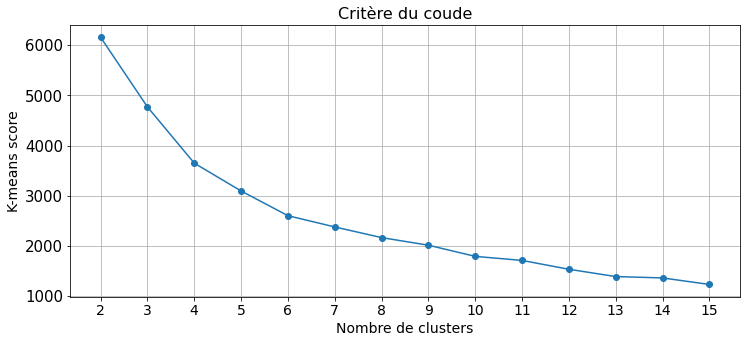

In [6]:

score = []

for i in range(2,15+1):
    km = KMeans(n_clusters=i,random_state=0).fit(X_scaled)
    preds = km.predict(X)
    score.append(-km.score(X_scaled))

plt.figure(figsize=(12,5))
plt.title("Critère du coude",fontsize=16)
plt.plot(range(2,16),score,marker='o')
plt.grid(True)
plt.xlabel('Nombre de clusters',fontsize=14)
plt.ylabel('K-means score',fontsize=14)
plt.xticks(range(2,16),fontsize=14)
plt.yticks(fontsize=15)
plt.show()

## Prédiction des clusters

In [13]:
kmeans=KMeans(n_clusters=4)
kmeans.fit(X_scaled)
preds=kmeans.predict(X_scaled) # predictions pour chaque observation son cluster d'appartenance
print(preds) 

[0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 3 0 0 0 0 0 0 0 0 0 0 2 0 0 3 0 0 3 0 0 0
 0 2 0 0 3 0 0 0 0 2 3 2 0 0 2 0 0 3 0 0 2 0 0 0 0 0 0 0 0 0 0 0 3 2 0 2 0
 0 1 2 0 0 3 2 0 3 0 2 2 2 0 0 0 0 2 2 3 0 3 0 0 0 2]


In [14]:
print("\n-----Le nombre d'observations dans chaque cluster-----\n")
for cluster in range(4):
    print(f"Le nombre d'observation du cluster {cluster+1} est : {sum(preds==cluster)}")


-----Le nombre d'observations dans chaque cluster-----

Le nombre d'observation du cluster 1 est : 69
Le nombre d'observation du cluster 2 est : 1
Le nombre d'observation du cluster 3 est : 19
Le nombre d'observation du cluster 4 est : 11


In [15]:
table['cluster'] = preds
# Ajout de la colonne département
table['libelle_departement']=table.index

In [16]:
for i in range(0,5) :
    print("\n* Les départements qui font partie du cluster ", i , "sont :\n")
    print(table[table.cluster==i].libelle_departement.values.tolist())


* Les départements qui font partie du cluster  0 sont :

['Ain', 'Aisne', 'Allier', 'Alpes-de-Haute-Provence', 'Ardennes', 'Ardèche', 'Ariège', 'Aube', 'Aude', 'Aveyron', 'Calvados', 'Cantal', 'Charente', 'Cher', 'Corrèze', 'Corse-du-Sud', 'Creuse', "Côte-d'Or", "Côtes-d'Armor", 'Deux-Sèvres', 'Dordogne', 'Doubs', 'Drôme', 'Eure', 'Eure-et-Loir', 'Gard', 'Gers', 'Guadeloupe', 'Guyane', 'Haut-Rhin', 'Haute-Corse', 'Haute-Loire', 'Haute-Marne', 'Haute-Saône', 'Haute-Vienne', 'Hautes-Alpes', 'Hautes-Pyrénées', 'Indre', 'Indre-et-Loire', 'Jura', 'La Réunion', 'Loir-et-Cher', 'Loire', 'Loiret', 'Lot', 'Lot-et-Garonne', 'Lozère', 'Maine-et-Loire', 'Manche', 'Marne', 'Martinique', 'Mayenne', 'Meurthe-et-Moselle', 'Meuse', 'Nièvre', 'Oise', 'Orne', 'Puy-de-Dôme', 'Pyrénées-Atlantiques', 'Sarthe', 'Saône-et-Loire', 'Somme', 'Tarn', 'Tarn-et-Garonne', 'Territoire de Belfort', 'Vaucluse', 'Vienne', 'Vosges', 'Yonne']

* Les départements qui font partie du cluster  1 sont :

['Paris']

* Les dépa

Nous constatons que Paris est seul dans son cluster. Nous nous attendions à ce résultat car sur la visualisation de notre ACP, Paris est très éloigné des autres départements.

## Représentation des communes dans un graphique à deux dimensions.

Nous allons visualiser les communes dans un plan avec les deux premières composantes isusues de notre ACP.

In [17]:
#ACP
from sklearn.decomposition import PCA

# Initialisation
acp = PCA()
acp.fit(X_scaled)

coordX = acp.transform(X_scaled) # Calculer les nouvelles colonnes obtenues par l'acp
df_new = pd.DataFrame(coordX,columns=[f'pca_{i}' for i in range(1,85)]) # Stocker les nouvelles colonnes dans une dataframe pandas avec comme nom de colonnes [pca_1,pca_2,...] 


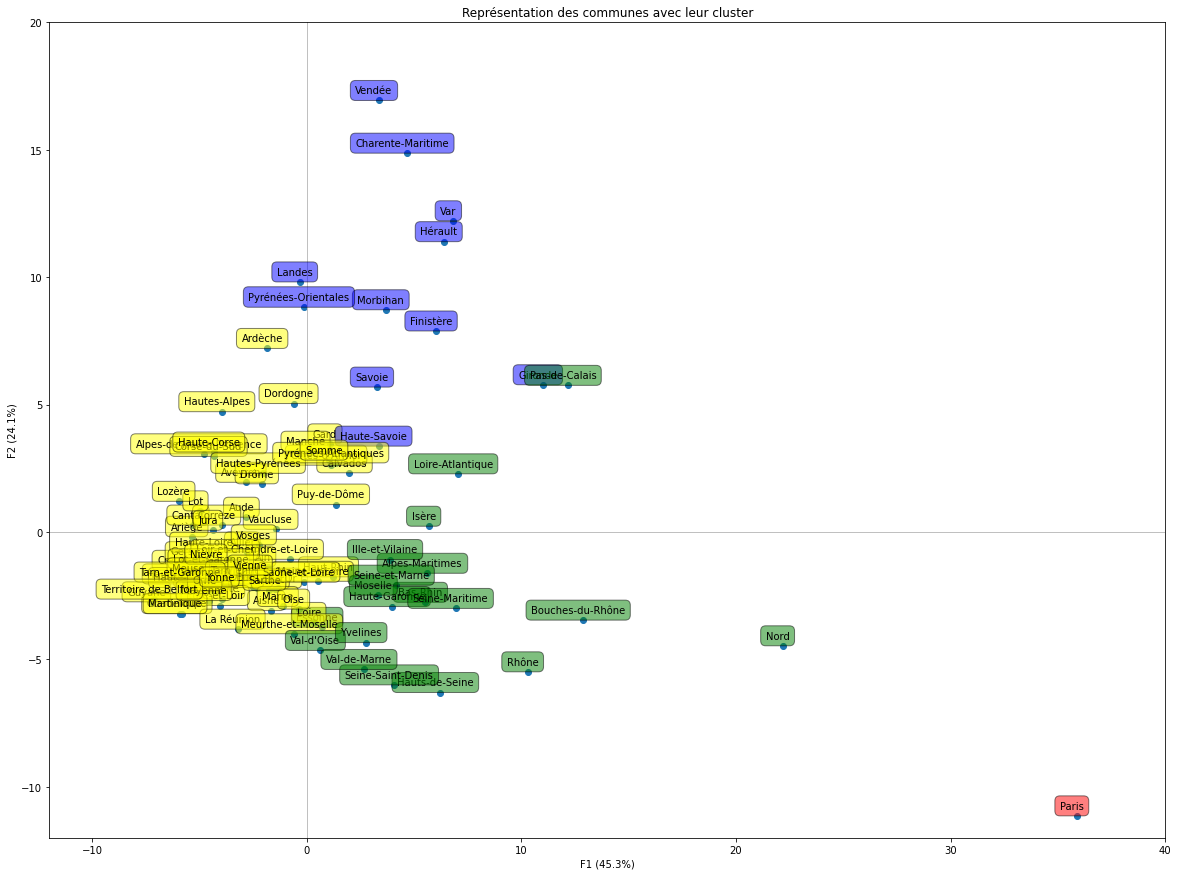

In [18]:
fig, axes = plt.subplots(figsize=(20,15))

#limites des axes
axes.set_xlim(-12,40) 
axes.set_ylim(-12,20)  #limites en ordonnées

plt.scatter(coordX[:, 0], coordX[:, 1])

colors = ['yellow','red','green',"Blue", "grey"]

for label, x, y,c in zip(table.libelle_departement.str.strip().values, coordX[:, 0], coordX[:, 1],table['cluster']):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-5, 5),
        textcoords='offset points', ha='center', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc=colors[c], alpha=0.5)
        #arrowprops = dict(arrowstyle='->', connectionstyle='arc3,rad=0')
    )

plt.plot([-12,40],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-12,20],color='silver',linestyle='-',linewidth=1)

# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(1, round(100*acp.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*acp.explained_variance_ratio_[1],1)))

plt.title("Représentation des communes avec leur cluster")
plt.show();

Les résultats obtenus du Kmeans sont similaires à ceux obtenus avec l'ACP. Nous constatons que les axes séparent bien les différents clusters entre eux. Nous constatons également et pouvons comprendre la postion de Paris. Paris, la capitale de la France, est à la fois tourisque pour les étrangers et a un grand nombre d'habitant. Cependant, elle reste enclavée et n'est donc pas un des départements de la France les plus blébiscités pour un séjour en vacances ou autre.